# 第二章: 二维向量绘图

In [4]:
%load_ext autoreload
%autoreload 2
# 这里导入了相同文件夹下的vector_drawing所有东西，用from ... import * 导入
from vector_drawing import *
from vectors import *

## 2.1 二维向量绘图

### 2.1.1 如何表示二维向量

本节没有代码

### 2.1.2 用Python绘制二维图形

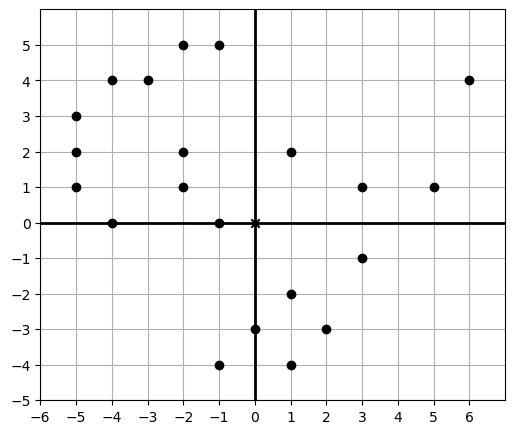

In [5]:
# 书P21
# 使用原组如(6, 4)表示二维点，下面是点的一个列表[(6,4), ..........]
dino_vectors = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2),
                (-5, 1), (-4, 0), (-2, 1), (-1, 0), (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)]
# 这里使用的*不是指针，是将列表中的元素一个个取出来作为参数，下面会给出一个示例
draw(
    Points(*dino_vectors)
)


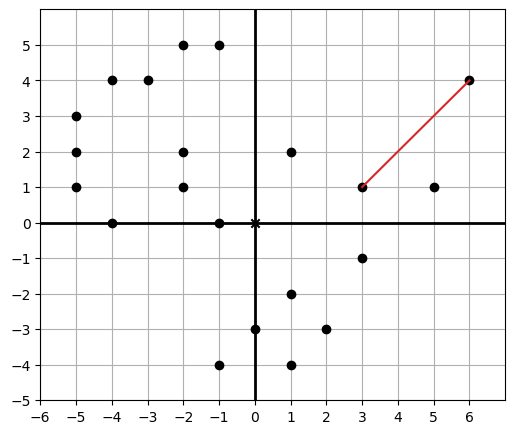

In [9]:
# 书P21
draw(
    Points(*dino_vectors),
    Segment((6,4),(3,1), color=red)
)

### 2.1.3 练习

#### **练习2.1** 恐龙脚趾间上的点的x坐标和y坐标是什么？

解：(-1, -4)

#### **练习2.2** 在平面上画出点(2, -2)和与之对应的箭头

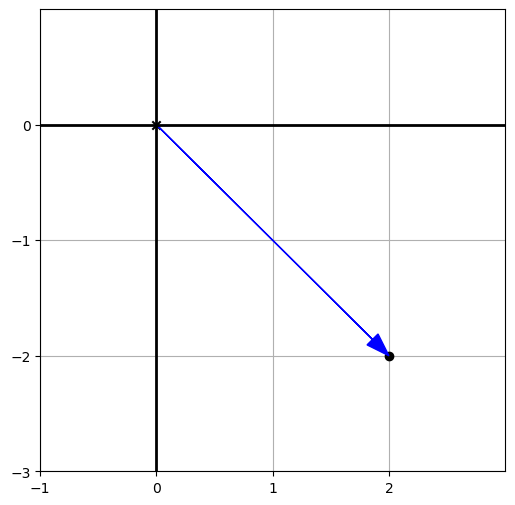

In [6]:
draw(
    Points((2, -2)),
    Arrow((2, -2), color="Blue")
)

#### **练习2.3** 通过观察恐龙各点的位置，推断dino_vectors列表未包含的其余向量。例如，列表已经包含了恐龙尾巴尖上的点(6, 4)，但不包含恐龙鼻子上的点(-5, 3)。完成后，dino_vectors列表中应该有由21个坐标对表示的向量。

In [2]:
# 恐龙轮廓的完整向量列表如下。
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

#### **练习2.4** 构建一个以 `dino_vectors` 为顶点的 `Polygon` 对象，画出将每个点相连的恐龙图像

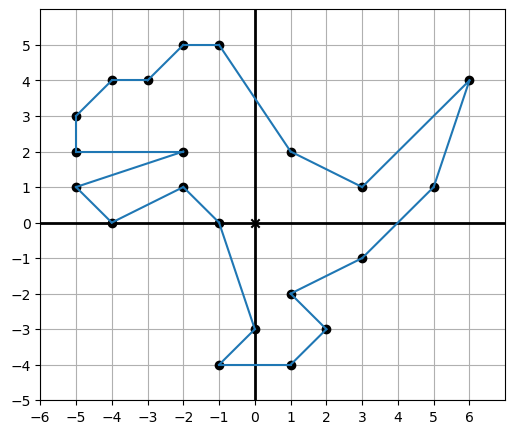

In [8]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

#### **练习2.5** 当$x$坐标在-10到10的范围内时，使用 `draw` 函数绘制表示向量`(x, x**2)` 的点。

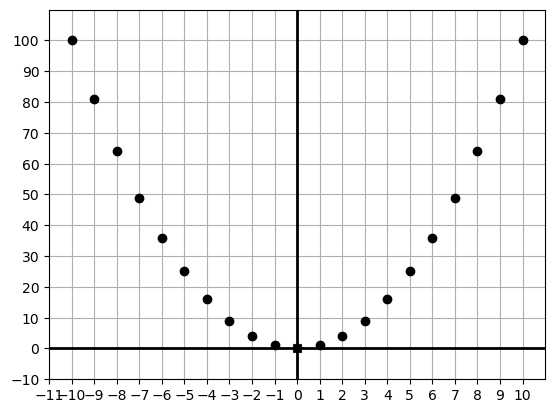

In [13]:
draw(
    Points(*[(x, x**2) for x in range(-10,11)]),
    grid=(1,10), # 每个1个单位水平网格线，每10单位垂直网格线
    nice_aspect_ratio=False # x，y轴比例可以不相同
)

## 2.2 平面向量运算

In [ ]:
# 书P25
def add(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

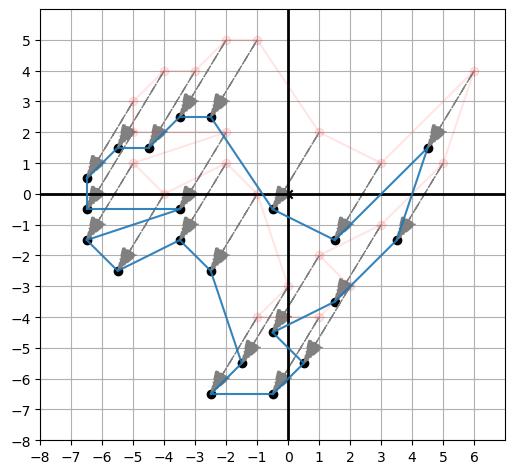

In [38]:
# 书P27
dino_vectors2 = [add((-1.5,-2.5), v) for v in dino_vectors]
arrows = [Arrow(tip,tail,color="gray", linestyle="-.") for (tip,tail) in zip(dino_vectors2, dino_vectors)]
draw(
    Points(*dino_vectors, color="red", alpha=0.1),
    Polygon(*dino_vectors, color="red", alpha=0.1),
    Points(*dino_vectors2),
    Polygon(*dino_vectors2, alpha=0.9),
    *arrows
)

### 2.2.1 向量的分量和长度

In [40]:
# 书P29
from math import sqrt
def length(v):
    return sqrt(v[0]**2 + v[1]**2)

### 2.2.2 向量与数相乘

无代码

###  2.2.3 减法、位移和距离

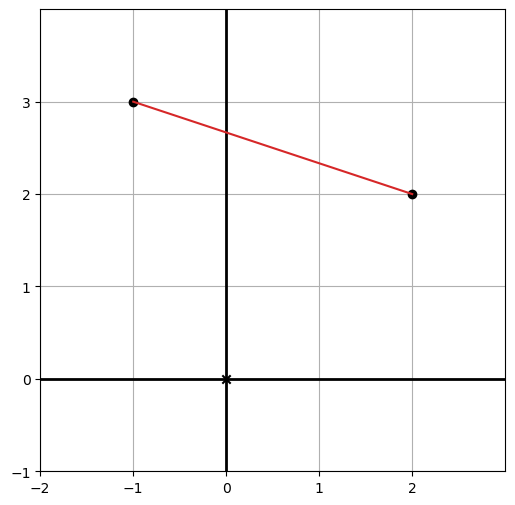

In [44]:
# 书P33，绘制v和w的位移
draw(
    Points((2,2), (-1,3)),
    Segment((2,2), (-1,3), color=red)
)

### 2.2.4 练习

#### **练习2.6** 对于向量$u=(-2, 0)$、向量$v=(1.5, 1.5)$和向量$w=(4, 1)$，$u+v$、$v+w$和$u+w$的结果是什么？$u+v+w$的结果又是什么？

u+v = (-2, 0) + (1.5, 1.5) = (-2+1.5, 0+1.5) = (-0.5, 1.5)


v+w = (1.5, 1.5) + (4, 1) = (1.5+4, 1.5+1) = (5.5, 2.5)


u+w = (-2, 0) + (4, 1) = (-2+4, 0+1) = (2, 1)


u+v+w = (-2, 0) + (1.5, 1.5) + (4, 1) = (-2+1.5+4, 0+1.5+1) = (3.5, 2.5)

#### **练习2.7（小项目）** 通过将所有向量各自的$x$坐标和$y$坐标相加，可以实现任何数量的向量相加。例如，向量和$(1,2) + (2,4) + (3,6) + (4,8)$ 有$x$分量 $1+2+3+4=10$ 与$y$分量 $2 + 4 + 6 + 8 = 20$ ，结果为$(10,20)$。实现新的 $add$ 函数，接受任意多个向量作为参数。

In [46]:
def add(*vectors):
    return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))

#### **练习2.8** 实现函数 translate(translation, vectors)， 接受一个平移向量和一个向量列表，返回一个根据平移向量平移后的向量列表。例如，`translate((1,1), [(0,0), (0,1), (-3,-3)])` 应该返回 `[(1,1),(1,2),(-2,-2)]`.

In [4]:
def translate(translation, vectors):
    return [ add(translation, item) for item in vectors]
translate((1,1), [(0,0), (0,1,), (-3,-3)])

[(1, 1), (1, 2), (-2, -2)]

#### **练习2.9** 向量之和$v+w$与$w+v$结果相同。用坐标形式的向量和的定义来解释其原因。同时，用图像来说明为什么这在几何上是成立的。

解：如果把两个向量$z=(a, b)$和v=(c, d)相加，其中坐标$a, b, c, d$都是实数，那么向量$z+v$的结果是$(a+c, b+d)$，而$v+z$的结果是$(c+a, d+b)$。这两对坐标相同，因为实数相加时的顺序并不重要。对于首尾加法，无论哪种顺序都能得到相同的向量和。为了更形象地解释这一点，图2-27展示了将一对向量首尾相加的示例。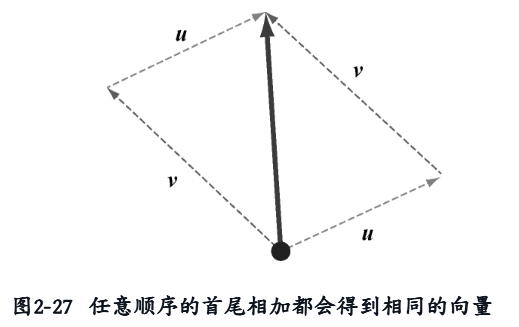不管是$z+v$还是$v+z$（虚线）​，得到的向量都是一样的（实线）​。在几何学中，两组$v$和$z$形成了一个平行四边形，而向量和就是对角线。

#### **练习2.10** 在如图2-28所示的三个箭头向量（标为$u$、$v$和$w$）中，哪一对的和对应的箭头最长？哪一对的和对应的箭头最短？

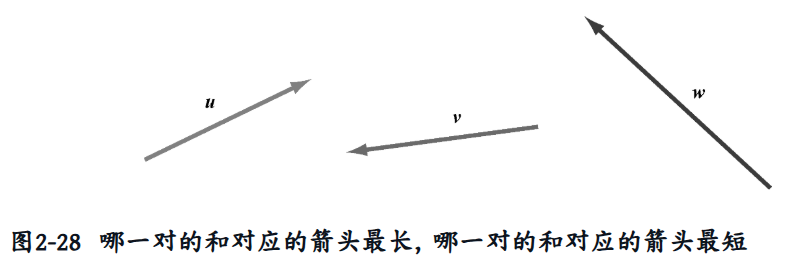

解：可以通过首尾加法测量每一对向量和，如图2-29所示。检查结果，可以看到$v$+$u$最短（$u$和$v$的方向几乎相反，接近于互相抵消）​，最长的是$v$+$w$。

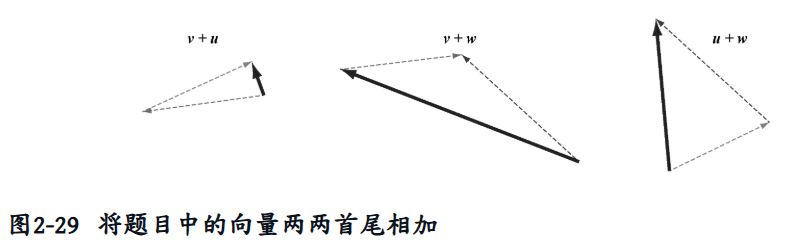

#### **练习 2.11** 实现一个处理向量加法的Python函数，显示100个相互不重叠的恐龙图像。这体现了计算机图形学的威力。想象一下，手绘2100个坐标对是一件多么乏味的事情！

解：可以在垂直和水平方向上平移恐龙，设置合适的间距，使它们不重叠。这里省去网格线、坐标轴、原点和坐标点，让图像更清晰一些。代码如下所示。

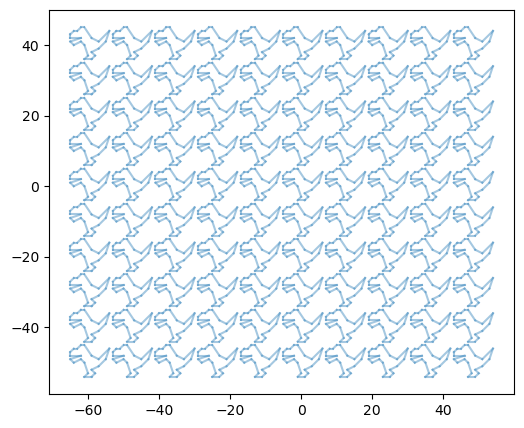

In [10]:
def hundred_dinos():
    translations = [(12*x,10*y) for x in range(-5,5) for y in range(-5,5)]
    dinos = [Polygon(*translate(t, dino_vectors),color=blue) for t in translations]
    draw(*dinos, grid=None, axes=None, origin=None)
hundred_dinos()

#### **练习2.12** 对于$(3, -2) + (1, 1) + (-2, -2)$，是$x$分量还是$y$分量更长？

解：向量和$(3, -2) + (1, 1) + (-2, -2)$的结果是$(2, -3)$，其中$x$分量为$(2, 0)$，$y$分量为$(0,-3)$。$x$分量的长度为2个单位（向右）​，而$y$分量的长度为3个单位（向下，因为它是负数）​。所以$y$分量更长。

#### **练习2.13** 向量$(-6, -6)$和$(5, -12)$的分量和长度分别是多少？

解：$(-6, -6)$的分量是$(-6, 0)$和$(0, -6)$，长度都是6。$(-6, -6)$的长度是$62 + 62$的平方根，大约是8.485。$(5, -12)$的分量是$(5, 0)$和$(0, -12)$，长度分别为5和12。$(5, -12)$的长度是$52 + 122 = 25 +144 = 169$的平方根，即13。

#### **练习2.14** 假设有一个长为6的向量$v$和它的$x$分量(1, 0)。$v$的坐标可能是什么？

解：因为$(1, 0)$的长度为1，其$x$分量的长度为1，所以$y$分量的长度$b$必须满足$1^2+b^2=6^2$，即$1+b^=36$。那么$b^2=35$，$y$分量的长度约为5.916。但无法确定$y$分量的方向。向量$v$可能是$(1, 5.916)$或($1, -5.916)$。

#### **练习2.15** dino_vectors列表中哪个向量的长度最长？用我们实现的length函数快速计算出答案。

In [5]:
# 这里max的第一个参数是可迭代的列表dino_vectors，
# 然后可选参数key=length中的length是之前定义的函数，这里用于比较dino_vectors的元素之间的大小
max(dino_vectors, key=length)

(6, 4)

In [8]:
# 这里介绍一下max的使用方法
# 文档： https://docs.python.org/zh-cn/3/library/functions.html?highlight=max#max

# 1.如果只提供了一个位置参数，它必须是非空 iterable，返回可迭代对象中最大的元素；
max1 = max([12, 32, 42, 12])
# 2.如果提供了两个及以上的位置参数，则返回最大的位置参数。
max2 = max(12, 90, 23, 12)

# 3.如果指定了key 实参指定排序函数用的参数
def distance_to618(number):
    """返回到6.18的距离大小"""
    return abs(number-6.18)
max3 = max(4, 5, 6, 9.26,  key=distance_to618)

print("max1:", max1, "max2:", max2, "max3:", max3)

max1: 42 max2: 90 max3: 9.26


#### **练习2.16** 假设向量 $\vec{w}$ 的坐标是 $(\sqrt{2} ,\sqrt{3})$. 那么 $\pi \cdot \vec{w}$ 的坐标近似值是多少？ 画出原向量和新向量。

π·sqrt(2) (1.4142135623730951, 1.7320508075688772)


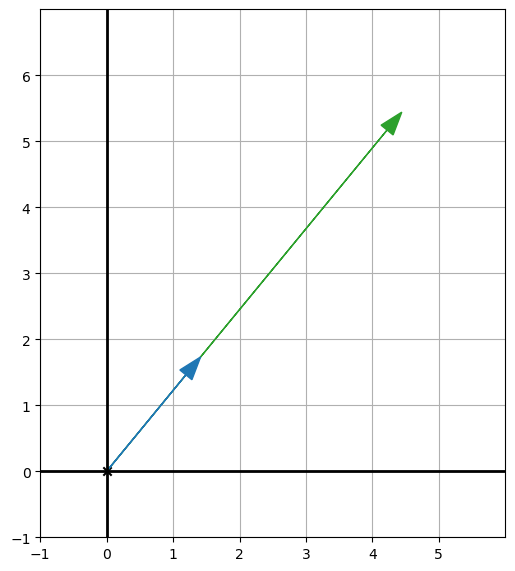

In [15]:
from math import sqrt, pi

w = (sqrt(2),sqrt(3))
w_scaled = (pi * sqrt(2), pi * sqrt(3))
print("π·sqrt(2)", w)
draw(
    Arrow(w_scaled, color=green),
    Arrow(w, color=blue)
)

#### **练习2.17** 写一个函数 `scale(s, v)`, 将输入向量 `v` 和输入标量 `s` 相乘。

In [17]:
def scale(scalar,v):
    return (scalar * v[0], scalar * v[1])

#### **练习2.18（小项目）** 用代数方法证明，将坐标按照一个系数缩放，会将向量的长度以同等系数缩放。假设一个长度为$c$的向量坐标为$(a, b)$。证明，对于任意非负实数$s$，$(s·a, s·b)$的长度是$s·c$。（$s$不能是负值，因为向量的长度不可能为负。）

解：用符号$|(a, b)|$来表示向量$(a, b)$的长度。从题目可得到如下公式。
$$
c = \sqrt{a^2 + b^2}=|(a, b)|
$$
从而算出$(sa, sb)$的长度。


$$
\begin{align*}
|(sa, sb)| &= \sqrt{(sa)^2 + (sb)^2} \\
           &= \sqrt{s^2a^2 + s^2b^2} \\
           &= \sqrt{s^2·(a^2 + b^2)} \\
           &= |s|·\sqrt{a^2 + b^2} \\
           &= |s|·c
\end{align*}
$$


如果$s$不是负值，那么$s=|s|$，缩放以后向量的长度就是$s·c$。

#### **练习2.19（小项目）** 假定 $\vec{u} = (-1,1)$ 和 $\vec{v} = (1,1)$, $r$ 和 $s$ 是实数，并且假设 $-1 < r < 1$ 且 $-3 < s < 3$.向量$r \cdot \vec{u} + s \cdot \vec{v}$在平面上可能的终点是什么?

注意:向量和数字的操作顺序是一样的:我们假设先进行标量乘法，然后进行向量加法(除非括号中另有说明)。

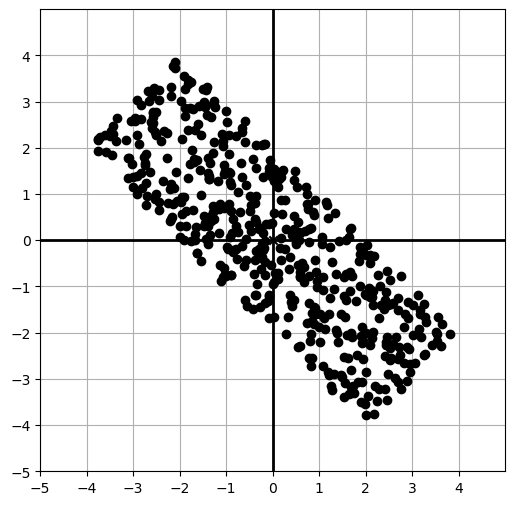

In [18]:
from random import uniform
# uniform函数在[a, b)或[a, b]范围内获取一个随机数。

u = (-1, 1)
v = (1, 1)

def random_r():
    return uniform(-3, 3)

def random_s():
    return uniform(-1, 1)


possibilities = [add(scale(random_r(), u), scale(random_s(), v)) for i in range(0, 500)]
draw(
    Points(*possibilities)
)

#### **练习2.20** 用代数法证明为什么一个向量和其负向量具有相同的长度。

提示：将向量坐标及其负向量坐标代入勾股定理的公式。

解：$(a, b)$的负向量的坐标为$(-a, -b)$，但并不影响长度（二者长度相等）。

$$
    \sqrt{(-a)^2 + (-b)^2} = \sqrt{a^2 + b^2}
$$

#### **练习2.21** 在如图2-33所示的七个用箭头表示的向量中，哪两个是一对相反的向量？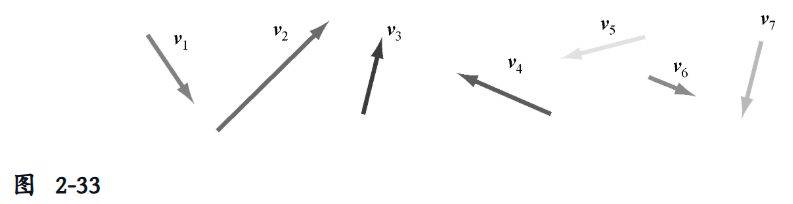

解：向量$v_3$和$v_7$是一对相反的向量。

#### **练习2.22** 假定$u$是任意二维向量。$u+(-u)$的坐标是什么？

解：二维向量$u$的坐标为$(a, b)$，其负向量的坐标为$(-a, -b)$，因此可以得到如下等式。
$$
    u+(-u) = (a, b) + (-a, -b) = (a-a, b-b) = (0, 0)
$$
答案是$(0, 0)$。在几何意义上，这意味着如果你沿着一个向量走到头、再折返回来，最终还是会回到原点$(0, 0)$。

#### **练习 2.23** 对于向量$u=(-2, 0)$、$v=(1.5, 1.5)$和$w=(4,1)$，$v-w$、$u-v$和$w-v$的结果分别是什么？

解：
$$
\begin{align*}
    &v-w = (1.5, 1.5) - (4, 1) = (1.5-4,  1.5-1) = (-2.5, 0.5) \\
    &u-v = (-2, 0) - (1.5, 1.5) = (-2-1.5, 0-1.5) = (-3.5, -1.5 \\
    &w-v = (4, 1) - (1.5, 1.5) = (4-1.5, 1-1.5)  = (2.5, -0.5)
\end{align*}
$$

#### **练习2.24** 实现python函数 `subtract(v1,v2)`, 返回 `v1` - `v2`。 该函数接受两个二维向量作为输入，返回一个二维向量作为输出。

In [21]:
def subtract(v1,v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

#### **练习2.25** 实现Python函数 `distance(v1, v2)`, 返回两个输入向量之间的距离。（注意，上一个练习中的 `subtract` 函数已经实现了两个向量之间的位移。

实现另一个函数 `perimeter(vectors)`，它接受一个向量列表作为参数，并返回每个向量到下一个向量的距离之和（包含末位向量与首位向量之间的距离），以此来获取向量几何 `dino_vectors` 所定义的恐龙周长。

In [27]:
def distance(v1,v2):
    return length(subtract(v1,v2))

def perimeter(vectors):
    distances = [distance(vectors[i], vectors[(i+1)%len(vectors)]) for i in range(0,len(vectors))]
    return sum(distances)

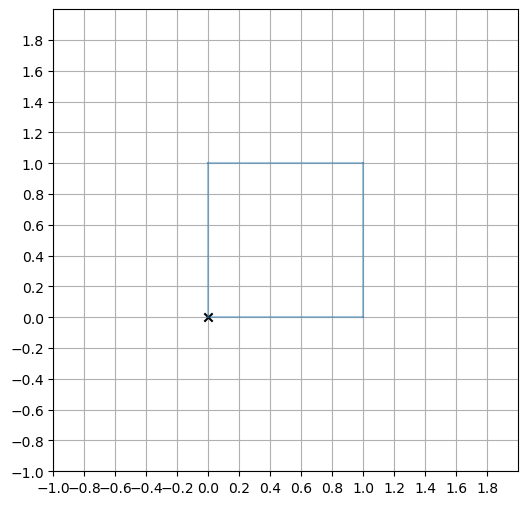

In [28]:
# 用正方形进行测试
square = [(1,0),(1,1),(0,1),(0,0)]
draw(Polygon(*square), grid=(0.2,0.2), axes=None)

In [29]:
# should be 1+1+1+1=4
perimeter(square)

4.0

In [30]:
perimeter(dino_vectors)

44.77115093694564

#### **练习2.26** 令 $\vec{u}$ 为向量 $(1,2)$。假定有另一个正整数坐标为 $(n, m)（n > m）$的向量 $\vec{v}$，且它与 $\vec{u}$ 的距离是13，那么从 $\vec{u}$ 到 $\vec{v}$ 的位移是所少？

**解决方案:** 我们只需要搜索可能的整数对(n,m)，其中n在1的前后13个单位内，m在-1的前后13个单位内。

In [31]:
for m in range(1, 13):
    for n in range(m+1, 15):
        if distance((n,m), (1,-1)) == 13:
            print((n,m))

(13, 4)


只找到了一个结果：(13, 4)。它相对于(1, -1)右移了12个单位、上移了5个单位，所以位移是(12, 5)。

# 平面上的角度和三角学  Angles and trigonometry in the plane

P41

## python中的弧度和三角学 Radians and trigonometry in python

In [ ]:
from math import tan
tan(45) 
# 45弧度，而不是45度
# tangent of 45 radians, not degrees

In [ ]:
from math import tan, pi
tan(pi/4)
# 现在是 pi/4 弧度 = 45度
# now this is the tangent of pi/4 radians = 45 degrees

In [ ]:
# P47
from math import sin, cos
def to_cartesian(polar_vector):
    """接受一对极坐标，返回对应的笛卡尔坐标"""
    length, angle = polar_vector[0], polar_vector[1]
    return (length*cos(angle), length*sin(angle))

In [ ]:
# P47 验证沿着37度的方向移动5个单位可以接近点（4，3）
# Verify that 5 units @ 37 degrees takes us to (4,3)
angle = 37*pi/180
to_cartesian((5,angle))

In [ ]:
from math import asin
print(sin(1), asin(0.8414709848078965))

In [ ]:
# 找出一个角x, 使 sin x = 3/sqrt(13)
# trying to find an angle x such that sin x = 3/sqrt(13)
from math import sqrt
asin(3/sqrt(13))

In [ ]:
from math import acos
acos(-2/sqrt(13))

In [ ]:
cos(2.1587989303424644)

In [ ]:
-2/sqrt(13)

In [ ]:
sin(2.1587989303424644)

In [ ]:
3/sqrt(13)

In [ ]:
# math.atan2(y, x) 以弧度为单位返回 atan(y / x)，在 -pi 和 pi 之间
# math.atan2的具体使用看这里：
# https://docs.python.org/zh-cn/3/library/math.html?highlight=math%20atan2#math.atan2
from math import atan2
atan2(3,-2)

In [ ]:
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return (length(vector), angle)

In [ ]:
to_polar((1,0))

In [ ]:
to_polar((-2,3))

**P50 练习2.27:** 确认笛卡尔坐标(-1.34,2.68)对应的向量的长度约为3

**EXERCISE:** Confirm that the vector given by cartesian coordinates (-1.34,2.68) has length approximately 3, as expected.

In [ ]:
length((-1.34,2.68))



**EXERCISE:** What is $116.57^\circ$ in radians?  Use Python to compute the tangent of this angle, and confirm that it is close to $-2$ as we saw above.

**SOLUTION:** $116.57^\circ · (1 \text{rad} / 57.296^\circ) = 2.035 \text{rad}.$

In [ ]:
tan(2.035)

**EXERCISE:** Locate the angle $10\pi/6$.  Do you expect the values of $\cos(10\pi/6)$ and $\sin(10\pi/6)$ to be positive or negative?  Use Python to calculate their values and confirm.

**SOLUTION:** The angle $\pi/6$ is one third of a quarter-turn, so $10\pi/6$ is less than a quarter turn short of a full rotation.  This means that it points "down and to the right".  The cosine should be positive and the sine should be negative, since distance in this direction corresponds with positive horizontal displacement and negative vertical displacement.

In [ ]:
sin(10*pi/6)

In [ ]:
cos(10*pi/6)

**EXERCISE:** The following list comprehension creates 1000 points in polar coordinates.  

In [ ]:
polar_coords = [(cos(5*x*pi/500.0), 2*pi*x/1000.0) for x in range(0,1000)]

In Python code, convert them to cartesian coordinates, and connect them in a closed loop with line segments to draw a picture.

In [ ]:
polar_coords = [(cos(x*pi/100.0), 2*pi*x/1000.0) for x in range(0,1000)]
vectors = [to_cartesian(p) for p in polar_coords]
draw(Polygon(*vectors, color=green))

**EXERCISE:** Find the angle to get to the point (-2,3) by “guess-and-check”.  

In [ ]:
# we want to make guesses between pi/2 and pi
pi, pi/2

In [ ]:
tan(1.8)

In [ ]:
tan(2.5)

In [ ]:
tan(2.2)

In [ ]:
tan(2.1)

In [ ]:
tan(2.15)

In [ ]:
tan(2.16)

In [ ]:
tan(2.155)

In [ ]:
tan(2.156)

In [ ]:
tan(2.157)

In [ ]:
tan(2.158)

In [ ]:
# we conclude the angle is between 2.158 and 2.159.
tan(2.159)

**EXERCISE:**  Find another point in the plane with the same tangent as $\theta$, that is $-3/2$.  Use Python’s implementation of the arctangent function, `math.atan`, to find the value of this angle.

In [ ]:
from math import atan

In [ ]:
atan(-3/2)

In [ ]:
# this is the direction to the point (2,-3).  
# tan(-3/2) = tan(-1.5) = tan(3/-2)
draw(Arrow((2,-3)), Points((2,-3)))

**EXERCISE:** Without using Python, what are polar coordinates corresponding to the cartesian coordinates $(1,1)$ and $(1,-1)$?  Once you’ve found the answers, use to_polar to check your work.

**SOLUTION:** The answers should be $(\sqrt{2},\pi/4)$ and $(\sqrt{2},-\pi/4)$.

In [ ]:
to_polar((1,1))

In [ ]:
to_polar((1,-1))

In [ ]:
#compare to
(sqrt(2), pi/4)

In [ ]:
(sqrt(2), -pi/4)

# 向量集合的变换  Transforming collections of vectors

P57

In [ ]:
rotation_angle = pi/3

dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l,angle + rotation_angle) for l,angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]

draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*dino_rotated, color=red)
)

**P60 练习2.42:** 实现 `rotate(angle, vectors)` 函数，接受笛卡尔坐标向量数组，并将这些向量旋转指定的角度（根据角度的正负来确定是逆时针还是顺时针）。

**EXERCISE:** Create a `rotate(angle, vectors)` function which takes an array of input vectors in cartesian coordinates and returns them by the specified angle (counterclockwise or clockwise according to whether the angle is positive or negative). 

In [ ]:
def rotate(angle, vectors):
    """将向量组vectors中的所有元素都逆时针旋转角度angle"""
    polars = [to_polar(v) for v in vectors]
    return [to_cartesian((l, a+angle)) for l,a in polars]

## 组合向量变换  Combining vector transformations

P59

In [ ]:
new_dino = translate((8,8), rotate(5 * pi/3, dino_vectors))

draw(
    Polygon(*new_dino, color=blue),
    Polygon(*dino_vectors, color=red)
)

**P60 练习2.43:** 实现函数 `regular_polygon(n)`, 返回一个规则 $n$ 边形的各顶点的笛卡尔坐标。

In [ ]:
def regular_polygon(n):
    """返回一个规则 n 边形的各顶点的笛卡尔坐标。"""
    return [to_cartesian((1, 2*pi*k/n)) for k in range(0,n)]

In [ ]:
draw(
    Polygon(*regular_polygon(7))
)

In [ ]:
draw(
    Polygon(*regular_polygon(5), color=green)
)